# Linear Regression

In this tutorial will learn how to use linear models in regression problems.

- simple linear regression : a response variable and single explanatory variable
- multiple linear regression: can support more than one explanatory variable
- polynomial regression: model nonlinear relationships


## Simple Linear Regression
Simple
linear regression can be used to model a linear relationship between one response
variable and one explanatory variable

### Lets predict the cost of the Pizza 

<img src="Images/Pizza.jpg" width="50%">

Suppose you wish to know the price of a pizza. You might simply look at a menu.
However, being a machine learning student, you might be curious to know how the prices are set. so we will use simple linear regression.
instead to predict the price of a pizza based on an attribute of the pizza that we can
observe. Let's model the relationship between the size of a pizza and its price. First,
we will write a program with scikit-learn that can predict the price of a pizza given
its size. Then, we will discuss how simple linear regression works and how it can
be generalized to work with other types of problems. Let's assume that you have
recorded the diameters and prices of pizzas that you have previously eaten in your
pizza journal. These observations comprise our training data:

#### Supervised Learning 
Regression analysis is a supervised machine learning techique. So we need a training data. Lets assume we have a toy toy data:
<img src="Images/Toy_data.jpg" width="50%">

In [11]:
import warnings
warnings.filterwarnings('ignore')

Populate the given data into Array

In [12]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

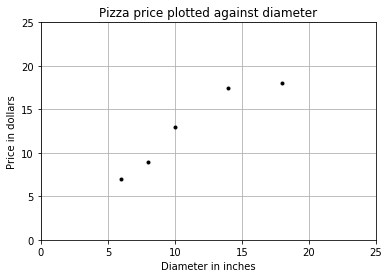

[[6], [8], [10], [14], [18]]


In [14]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()
print(X)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

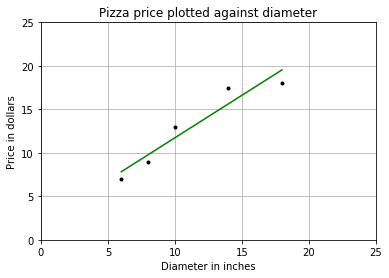

In [17]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.plot(X, model.predict(X),'g')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [18]:
#from IPython.html import widgets
#from IPython.html.widgets import interact
#from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [19]:
def PrzzaPricePredictor(dia):
    print ('A %d " pizza should cost: $%.2f'%(dia,model.predict([dia])[0]))

In [20]:
i = interact(PrzzaPricePredictor, dia=(0,10))

interactive(children=(IntSlider(value=5, description='dia', max=10), Output()), _dom_classes=('widget-interact',))

### Evaluating the fitness of a model with a cost function
Regression lines produced by several sets of parameter values are plotted in the
following figure. How can we assess which parameters produced the best-fitting
regression line?

A cost function, also called a loss function, is used to define and measure the
error of a model. The differences between the prices predicted by the model and
the observed prices of the pizzas in the training set are called residuals or training
errors. Later, we will evaluate a model on a separate set of test data; the differences
between the predicted and observed values in the test data are called prediction
errors or test errors.

We can produce the best pizza-price predictor by minimizing the sum of the residuals.
That is, our model fits if the values it predicts for the response variable are close to the
observed values for all of the training examples. This measure of the model's fitness is
called the residual sum of squares cost function. Formally, this function assesses the
fitness of a model by summing the squared residuals for all of our training examples.
The residual sum of squares is calculated with the formula in the following equation,
where, $y_{i}$ is observed value and $f(X_{i})$ is predicted value

\begin{equation}
  SS_{res}=\sum_{i=1}^{n} \left({y_{i}-f(X_{i})}\right)^{2} 
\end{equation}



In [21]:
import numpy as np
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2))

Residual sum of squares: 1.75


### Evaluating the model

Suppose that you applied this model to a test dataset as shown below:
<img src="Images/Toy_data_test.jpg" width="60%">

Then how to evaluate the performace of the model ?

\begin{equation}
  SS_{tot}=\sum_{i=1}^{n} \left({y_{i}-y_{mean}}\right)^{2} 
\end{equation}

\begin{equation}
  SS_{res}=\sum_{i=1}^{n} \left({y_{i}-f(X_{i})}\right)^{2} 
\end{equation}

R-Square Error:

\begin{equation}
  R^{2}=1-\frac{SS_{res}}{SS_{tot}} 
\end{equation}


In [12]:
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]


In [13]:
model = LinearRegression()
model.fit(X, y)
print ('R-squared: %.4f' % model.score(X_test, y_test))

R-squared: 0.6620


## Multiple linear regression
Recalling your personal pizza-eating experience, you might have some intuitions
about the other attributes of a pizza that are related to its price. For instance, the
price often depends on the number of toppings on the pizza.
<img src="Images/Toy_data2.jpg" width="60%">

In [14]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

In [15]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
def PrzzaTopPricePredictor(dia,Top):
    print ('A %d " with %d Topping pizza should cost: $%.2f'%(dia, Top,model.predict([dia,Top])))

In [17]:
i = interact(PrzzaTopPricePredictor, dia=(0,100), Top=(0,5))

interactive(children=(IntSlider(value=50, description='dia'), IntSlider(value=2, description='Top', max=5), Output()), _dom_classes=('widget-interact',))

### Evaluating the fitness of a model with a cost function

In [18]:
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2))

Residual sum of squares: 1.65


## Polynomial regression

In [22]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [23]:
xx = np.linspace(0, 26, 100)

In [24]:
def PolynomialRegression(degree):
    
    X = [[6], [8], [10], [14], [18]]
    y = [[7], [9], [13], [17.5], [18]]
    
    # Simple linear regression first
    regressor = LinearRegression()
    regressor.fit(X, y)
    xx = np.linspace(0, 26, 100)
    yy = regressor.predict(xx.reshape(xx.shape[0], 1))
    
    quadratic_featurizer = PolynomialFeatures(degree)
    X_quadratic = quadratic_featurizer.fit_transform(X)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_quadratic, y)
    xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
    
    print ('Residual sum of squares: %.2f' % np.mean(( regressor_quadratic.predict(X_quadratic)- y) ** 2))
    
    plt.plot(xx, yy)
    plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')
    plt.title('Pizza price regressed on diameter')
    plt.xlabel('Diameter in inches')
    plt.ylabel('Price in dollars')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    plt.scatter(X,y)
    plt.show()

    
    

In [25]:
i = interact(PolynomialRegression, degree=(0,10))

interactive(children=(IntSlider(value=5, description='degree', max=10), Output()), _dom_classes=('widget-interact',))